Name : Naseer Ahmad Taraki                   Batch :03

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [20]:
# Load the dataset
df = pd.read_excel('OnlineRetail.xlsx', engine='openpyxl')
# Display the first few rows of the dataset
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [21]:
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [22]:
df.columns = df.columns.str.strip()


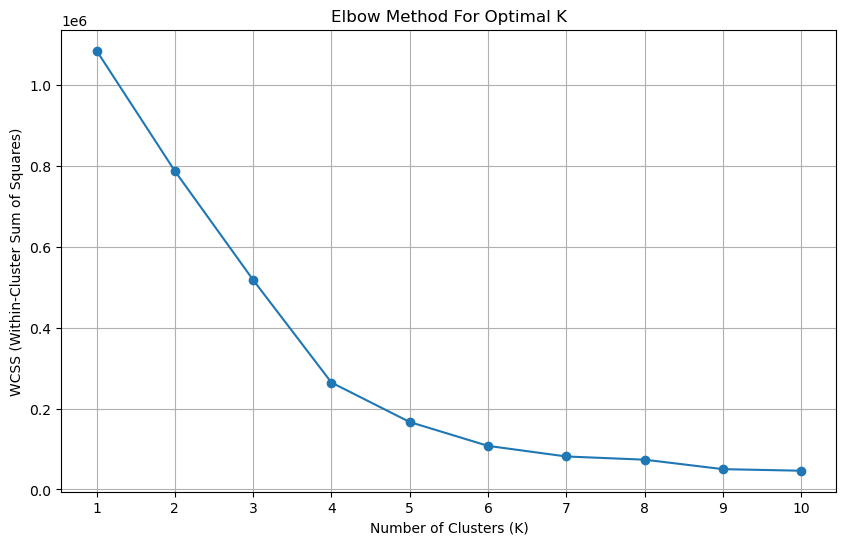

In [23]:
# Preprocess data
df = df.dropna(subset=['Quantity', 'UnitPrice']
features = df[['Quantity', 'UnitPrice']]

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Calculate WCSS for different values of K
wcss = []
k_values = range(1, 11)  # You can adjust the range as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)  # WCSS is the inertia attribute

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid()
plt.show()


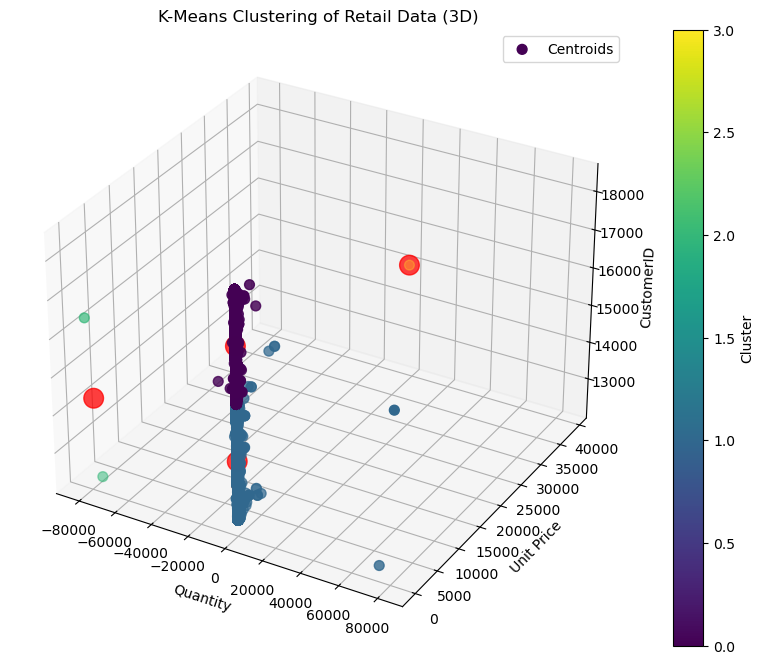

In [24]:
# Preprocess data
df = df.dropna(subset=['Quantity', 'UnitPrice', 'CustomerID'])
features = df[['Quantity', 'UnitPrice', 'CustomerID']]

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Apply K-Means
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(normalized_features)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clusters
scatter = ax.scatter(df['Quantity'], df['UnitPrice'], df['CustomerID'], c=df['Cluster'], cmap='viridis', s=50 )

# Plot the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Inverse transform to original scale
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, label='Centroids')

# Labels and title
ax.set_title('K-Means Clustering of Retail Data (3D)')
ax.set_xlabel('Quantity')
ax.set_ylabel('Unit Price')
ax.set_zlabel('CustomerID')

# Legend
plt.legend(['Centroids'])
plt.colorbar(scatter, ax=ax, label="Cluster")

# Show plot
plt.show()
